In [5]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
csv = np.genfromtxt('weather2.csv', delimiter = "," , skip_header=1)
month = csv[:,1]
day = csv[:,2]
#monthday = np.column_stack((month, day)) IGNORE. Alternative method of obtaining Month/Day as an index.

maxtemp = csv[:,4] #List of dependent variable arrays
mintemp = csv[:,6]
meantemp = csv[:,8]
HeatDegDays = csv[:,10]
CoolDegDays = csv[:,12]
TotalRain= csv[:,14]
TotalSnow= csv[:,16]
TotalPrecip= csv[:,18]
SnowOnGrnd = csv[:,20]
DirMaxGust = csv[:,22]
SpdMaxGust = csv[:,24]
monthday = np.arange('2016-01-01', '2017-01-01', dtype = 'datetime64[D]')
monthday = np.arange(0,366,1)

"\nHeating degree days are a form of measurement designed to quantify how much energy is needed to heat up a building by\nmeasuring the outside temperature. Vice versa the Cooling degree days are how much energy is needed to cool down a building, \nbased on how warm it is outside.\n\nOn the hottest days (Max Temperatures) we would expect the Cooling Degree Days to be highest. \nThat is the energy required to cool down the building to be highest. This is precisely what we see in the first graph.\nOn both ends the cooling degree day is at zero. This makes sense as it is winter and the complimenting max temperature is\nextremely low and below zero at times; you wouldn't want to cool an already very cold building.\n\nConversely, we see the opposite in the second graph. As one would expect the heating degree days is highest during the lowest\ntemperatures, due to the need to warm up the buildings in the coldest times of the year. The two graphs are near mirror \nimages of each other, indica

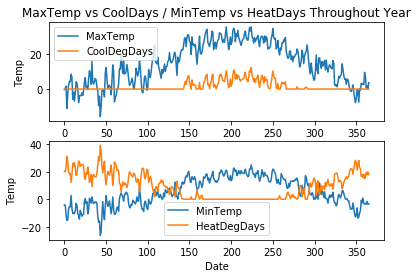

In [6]:
#Max temperatures vs cooling energy needed / Min temperatures vs heating energy needed

plt.figure(1)
plt.subplot(211)
plt.plot(monthday, maxtemp, monthday, CoolDegDays)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('MaxTemp vs CoolDays / MinTemp vs HeatDays Throughout Year')
plt.legend(['MaxTemp' , 'CoolDegDays'])


plt.subplot(212, )
plt.plot(monthday, mintemp, monthday, HeatDegDays)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend(['MinTemp' , 'HeatDegDays'])


'''
Heating degree days are a form of measurement designed to quantify how much energy is needed to heat up a building by
measuring the outside temperature. Vice versa the Cooling degree days are how much energy is needed to cool down a building, 
based on how warm it is outside.

On the hottest days (Max Temperatures) we would expect the Cooling Degree Days to be highest. 
That is the energy required to cool down the building to be highest. This is precisely what we see in the first graph.
On both ends the cooling degree day is at zero. This makes sense as it is winter and the complimenting max temperature is
extremely low and below zero at times; you wouldn't want to cool an already very cold building.

Conversely, we see the opposite in the second graph. As one would expect the heating degree days is highest during the lowest
temperatures, due to the need to warm up the buildings in the coldest times of the year. The two graphs are near mirror 
images of each other, indicating the inverse proportional relationship they share, except for the middle during the summer, 
during which there is no reason to heat up an already sweltering building.

'''



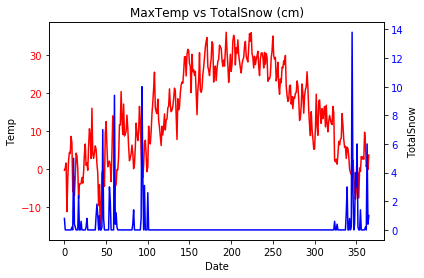

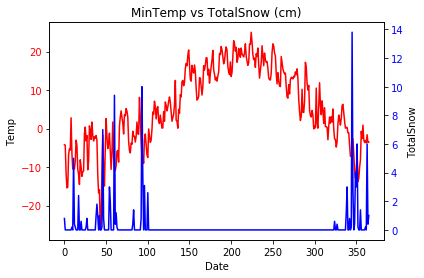

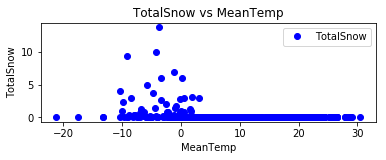

In [7]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temp')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('TotalSnow')
    return ax1, ax2

"""
    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
"""

# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, maxtemp, TotalSnow, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('MaxTemp vs TotalSnow (cm)')



fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, mintemp, TotalSnow, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('MinTemp vs TotalSnow (cm)')


fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, meantemp, TotalSnow, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('MeanTemp vs TotalSnow (cm)')


'''
Simple comparison of highest snowfall across the different temperatures in the year. As expected, the highest snowfall happened
in the coldest parts of the winter. Nothing too different from our intuition, but reaffirms that the data is accurate.
'''

plt.subplot(212)
plt.plot(meantemp, TotalSnow, 'bo')
plt.xlabel('MeanTemp')
plt.ylabel('TotalSnow')
plt.title('TotalSnow vs MeanTemp')
plt.legend(['TotalSnow'])

Text(0.5,1,'TotalSnow vs SnowOnGrnd')

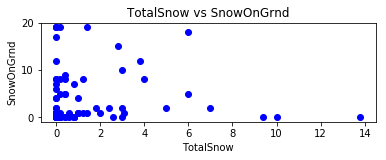

In [13]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SnowOnGrnd (cm)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('TotalSnow (cm)')
    return ax1, ax2

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, SnowOnGrnd, TotalSnow, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('SnowOnGrnd  vs TotalSnow ')


'''
A study into how much of the snow that falls, actually makes it onto the ground. By and large the amounts are no doubt similar
but upon closer inspection, its clear that in Jan-Mar, ~25% of the snow does not reach the ground.
During the winter however, alot of it does. A possible reason is the winds may be more powerful during these seasons, carrying 
the snow long enough for it to melt before it reaches the ground. This leads to the next secton
'''


plt.subplot(212)
plt.plot(TotalSnow, SnowOnGrnd, 'bo')
plt.xlabel('TotalSnow')
plt.ylabel('SnowOnGrnd')
plt.title('TotalSnow vs SnowOnGrnd')

Text(0.5,1,'TotalSnow vs SnowOnGrnd')

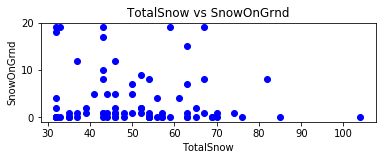

In [14]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SpdMaxGust (km/h)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('SnowOnGrnd (cm)')
    return ax1, ax2

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, SpdMaxGust, SnowOnGrnd, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('SpdMaxGust vs SnowOnGrnd')


plt.subplot(212)
plt.plot(SpdMaxGust, SnowOnGrnd, 'bo')
plt.xlabel('TotalSnow')
plt.ylabel('SnowOnGrnd')
plt.title('TotalSnow vs SnowOnGrnd')

Text(0.5,1,'SpdMaxGust vs Temp')

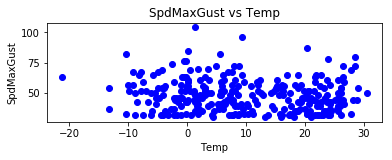

In [18]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SpdMaxGust (km/h)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('Temp')
    return ax1, ax2

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, SpdMaxGust, meantemp, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('SpdMaxGust vs Temp')
'''
Graph exploring any possible correlations between speed of wind gust and temperature. Temperature is lower when winds blow 
hardest. This makes sense as windchill contributes to the lower temperature. 
'''

plt.subplot(212)
plt.plot(meantemp, SpdMaxGust, 'bo')
plt.xlabel('Temp')
plt.ylabel('SpdMaxGust')
plt.title('SpdMaxGust vs Temp')

'\nGraph exploring any possible correlations between speed of wind gust and temperature. Temperature is lower when winds blow \nhardest. This makes sense as windchill contributes to the lower temperature. \n'

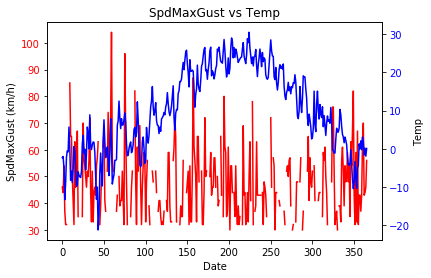

In [8]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SpdMaxGust (km/h)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('Temp')
    return ax1, ax2

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, SpdMaxGust, meantemp, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('SpdMaxGust vs Temp')
'''
Graph exploring any possible correlations between speed of wind gust and temperature. Temperature is lower when winds blow 
hardest. This makes sense as windchill contributes to the lower temperature. 
'''

Text(0.5,1,'SpdMaxGust vs SnowOnGrnd')

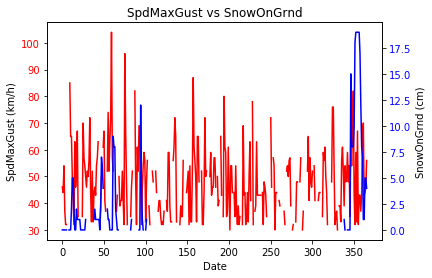

In [9]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SpdMaxGust (km/h)')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('SnowOnGrnd (cm)')
    return ax1, ax2

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, monthday, SpdMaxGust, SnowOnGrnd, 'r', 'b')
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('SpdMaxGust vs SnowOnGrnd')